In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

#%matplotlib notebook
%matplotlib inline
np.random.seed(1337)

def get_session(gpu_fraction=0.8):
    gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=gpu_fraction, allow_growth=True)
    return tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

keras.backend.set_session(get_session())
print(tf.__version__, keras.__version__)

1.4.1 2.0.8-tf


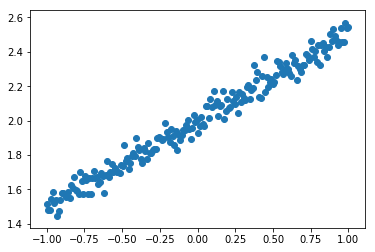

train loss: 3.7589, step: 0
train loss: 0.00205394, step: 100
train loss: 0.00205381, step: 200
train loss: 0.00205381, step: 300
train loss: 0.00205381, step: 400
train loss: 0.00205381, step: 500
train loss: 0.00205381, step: 600
train loss: 0.00205381, step: 700
train loss: 0.00205381, step: 800
train loss: 0.00205381, step: 900
train loss: 0.00205381, step: 1000


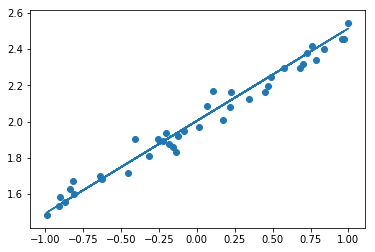

In [16]:
def add_layer(inputs, input_unit_num, output_unit_num, activation=None):
    W = tf.Variable(tf.random_normal((input_unit_num, output_unit_num)))
    B = tf.Variable(tf.zeros((1,output_unit_num))+0.1)
    output = tf.matmul(inputs, W) + B
    if activation is not None:
        output = activation(output)
    return output

X = np.linspace(-1, 1, 200)
np.random.shuffle(X)
Y = 0.5*X + 2 + np.random.normal(0, 0.05, (200,))

plt.scatter(X,Y)
plt.show()

X_train, Y_train = X[:160][:,np.newaxis], Y[:160][:,np.newaxis]
X_test, Y_test = X[160:][:,np.newaxis], Y[160:][:,np.newaxis]

g = tf.Graph()
with g.as_default():
    inputs = tf.placeholder(tf.float32, (None,1))
    labels = tf.placeholder(tf.float32, (None,1))
    outputs = add_layer(inputs, 1, 1)
    loss = tf.reduce_mean(tf.reduce_sum(tf.square(labels-outputs),reduction_indices=[1]))
    optimizer = tf.train.GradientDescentOptimizer(0.1)
    train = optimizer.minimize(loss)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for step in range(1001):
            _,l = sess.run([train,loss], feed_dict={inputs: X_train, labels: Y_train})            
            if step%100 == 0:
                print("train loss: %s, step: %s" % (l, step))
        
        Y_pred = sess.run(outputs, feed_dict={inputs: X_test})
        plt.scatter(X_test, Y_test)
        plt.plot(X_test, Y_pred)
        plt.show()

In [ ]:
from tensorflow.python.keras.datasets import mnist

(X_train,Y_train), (X_test,Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], -1)/255
X_test = X_test.reshape(X_test.shape[0], -1)/255

print(X_train.shape, np.unique(Y_train))

def add_layer(inputs, input_unit_num, output_unit_num, activation=None):
    W = tf.Variable(tf.random_normal((input_unit_num, output_unit_num)))
    B = tf.Variable(tf.zeros((1, output_unit_num))+0.1)
    output = tf.matmul(inputs, W) + B
    if activation is not None:
        output = activation(output)
    return output

def get_one_hot(labels):
    unq = np.unique(labels)
    incs = np.arange(unq.shape[0])
    one_hot = np.zeros((incs.shape[0], incs.shape[0]))
    one_hot[np.arange(incs.shape[0]), incs] = 1
    
    def trans_one_hot_to_label(hots):
        decode_lables = np.zeros((hots.shape[0],), dtype=unq.dtype)
        for i in range(hots.shape[0]):
            h = hots[i]
            for j in range(unq.shape[0]):
                if np.all(one_hot[j] == h):
                    decode_lables[i] = unq[j]
                    break
        return decode_lables
            
    def trans_label_to_one_hot(lables):
        ont_hot_labels = np.zeros((lables.shape[0], unq.shape[0]), dtype=one_hot.dtype)
        for i in range(unq.shape[0]):
            ont_hot_labels[lables == unq[i]] =  one_hot[i]
        return ont_hot_labels
    
    return trans_label_to_one_hot, trans_one_hot_to_label

trans_label_to_one_hot, trans_one_hot_to_label = get_one_hot(Y_train)
print(Y_train[:1])
print(trans_label_to_one_hot(Y_train)[:1])
print(trans_one_hot_to_label(trans_label_to_one_hot(Y_train)[:1]))

model = Sequential([
    Dense(32, input_dim=784),
    Activation("relu"),
    Dense(10),
    Activation("softmax")
])

with tf.Graph().as_default():
    inputs = tf.placeholder(tf.float32, (None,784))
    lables = tf.placeholder(tf.float32, (None,10))

    output = add_layer(inputs, 784, 32, activation=tf.nn.relu)
    output = add_layer(output, 32, 10, activation=tf.nn.softmax)

    loss = tf.losses.softmax_cross_entropy(lables, output)
    train = tf.train.RMSPropOptimizer(0.001).minimize(loss)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for step in range(1001):
            _,l = sess.run([train,loss], feed_dict={inputs: X_train, labels: Y_train})            
            if step%100 == 0:
                print("train loss: %s, step: %s" % (l, step))
        

model.compile(loss="categorical_crossentropy", optimizer=RMSprop(lr=0.001, rho=0.9), metrics=['accuracy'])
model.fit(X_train, keras.utils.to_categorical(Y_train), epochs=2, batch_size=32)

loss, accuracy = model.evaluate(X_test, keras.utils.to_categorical(Y_test))
print("test loss: %s, accuracy: %s" % (loss, accuracy))

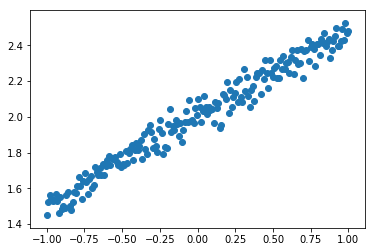

train cost: 4.03971, step: 0
train cost: 0.0750003, step: 100
train cost: 0.00426467, step: 200
train cost: 0.00274481, step: 300
train cost: 0.00264762, step: 400
train cost: 0.002628, step: 500
train cost: 0.0026231, step: 600
train cost: 0.00262185, step: 700
train cost: 0.00262154, step: 800
train cost: 0.00262146, step: 900
train cost: 0.00262144, step: 1000
40/40 [==============================] - 0s
test cost:  0.00324829109013
Weight:  [[ 0.4915002]]
Bias:  [ 2.00406551]


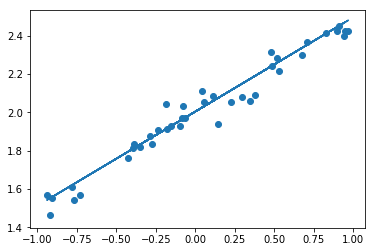

In [31]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

X = np.linspace(-1, 1, 200)
np.random.shuffle(X)
Y = 0.5*X + 2 + np.random.normal(0, 0.05, (200,))

plt.scatter(X,Y)
plt.show()

X_train, Y_train = X[:160], Y[:160]
X_test, Y_test = X[160:], Y[160:]

model = Sequential()
model.add(Dense((1), input_dim=1))
model.compile(loss='mse', optimizer='sgd')

for step in range(1001):
    cost = model.train_on_batch(X_train, Y_train)
    if step%100 == 0:
        print("train cost: %s, step: %s" % (cost, step))
        
cost = model.evaluate(X_test, Y_test, batch_size=40)
print("test cost: ", cost)
W,b = model.layers[0].get_weights()
print("Weight: ",W)
print("Bias: ",b)

Y_pred = model.predict(X_test)
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred)
plt.show()

In [32]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Activation
from tensorflow.python.keras.optimizers import RMSprop
from tensorflow.python.keras.datasets import mnist

(X_train,Y_train), (X_test,Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], -1)/255
X_test = X_test.reshape(X_test.shape[0], -1)/255

print(X_train.shape, np.unique(Y_train))

def get_one_hot(labels):
    unq = np.unique(labels)
    incs = np.arange(unq.shape[0])
    one_hot = np.zeros((incs.shape[0], incs.shape[0]))
    one_hot[np.arange(incs.shape[0]), incs] = 1
    
    def trans_one_hot_to_label(hots):
        decode_lables = np.zeros((hots.shape[0],), dtype=unq.dtype)
        for i in range(hots.shape[0]):
            h = hots[i]
            for j in range(unq.shape[0]):
                if np.all(one_hot[j] == h):
                    decode_lables[i] = unq[j]
                    break
        return decode_lables
            
    def trans_label_to_one_hot(lables):
        ont_hot_labels = np.zeros((lables.shape[0], unq.shape[0]), dtype=one_hot.dtype)
        for i in range(unq.shape[0]):
            ont_hot_labels[lables == unq[i]] =  one_hot[i]
        return ont_hot_labels
    
    return trans_label_to_one_hot, trans_one_hot_to_label

trans_label_to_one_hot, trans_one_hot_to_label = get_one_hot(Y_train)
print(Y_train[:1])
print(trans_label_to_one_hot(Y_train)[:1])
print(trans_one_hot_to_label(trans_label_to_one_hot(Y_train)[:1]))

model = Sequential([
    Dense(32, input_dim=784),
    Activation("relu"),
    Dense(10),
    Activation("softmax")
])
model.compile(loss="categorical_crossentropy", optimizer=RMSprop(lr=0.001, rho=0.9), metrics=['accuracy'])
model.fit(X_train, keras.utils.to_categorical(Y_train), epochs=2, batch_size=32)

loss, accuracy = model.evaluate(X_test, keras.utils.to_categorical(Y_test))
print("test loss: %s, accuracy: %s" % (loss, accuracy))

(60000, 784) [0 1 2 3 4 5 6 7 8 9]
[5]
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]]
[5]
Epoch 1/2
60000/60000 [==============================] - 5s - loss: 0.3567 - acc: 0.9023     
Epoch 2/2
 9760/10000 [============================>.] - ETA: 0stest loss: 0.173434070394, accuracy: 0.9498
